The aim of this notebook is to implement nlp techniques to determine whether a news article is real or fake. The dataset can be found at https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
# Import data for true and fake news articles from csvs
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

display(df_true.head())
display(df_fake.head())

# Replace the fake column in both dataframes with 1 for fakes and 0 for true articles
df_true['fake'] = 0
df_fake['fake'] = 1

# Combine both the true and fake news articles into a single dataset
df = pd.concat([df_true, df_fake])

display(df.sample(5))
display(df.isnull().sum())

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


,title,text,subject,date,fake
6307,Kremlin says too early to react to Trump nucle...,MOSCOW (Reuters) - The Kremlin said on Monday ...,politicsNews,"January 16, 2017",0
5239,"Countering anti-Trump protests, president's fa...",ATLANTA (Reuters) - Supporters of U.S. Preside...,politicsNews,"February 27, 2017",0
14059,ACTRESS JODIE FOSTER Weighs In On The Phony ‘W...,Jodie Foster gives a dose of common sense to ...,politics,"Apr 23, 2016",1
10272,Ex-Connecticut Governor Rowland appeals convic...,NEW YORK (Reuters) - Former Connecticut Govern...,politicsNews,"March 18, 2016",0
20049,"Trump says he will visit Japan, South Korea, C...",ABOARD AIR FORCE ONE (Reuters) - U.S. Presiden...,worldnews,"September 14, 2017",0


title      0
text       0
subject    0
date       0
fake       0
dtype: int64

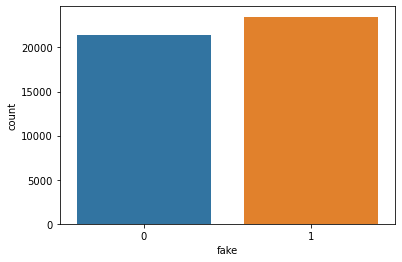

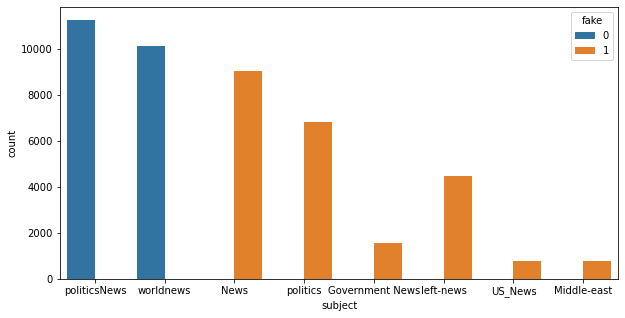

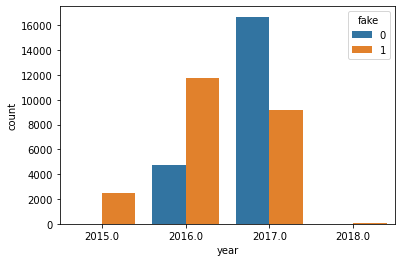

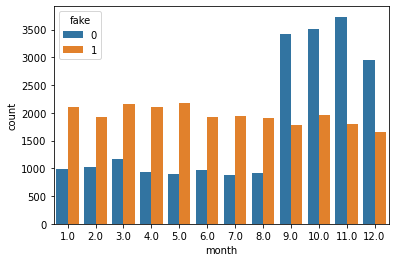

,title,subject,date,fake,year,month
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,2017-12-31,0,2017.0,12.0
1,U.S. military to accept transgender recruits o...,politicsNews,2017-12-29,0,2017.0,12.0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,2017-12-31,0,2017.0,12.0
3,FBI Russia probe helped by Australian diplomat...,politicsNews,2017-12-30,0,2017.0,12.0
4,Trump wants Postal Service to charge 'much mor...,politicsNews,2017-12-29,0,2017.0,12.0


In [4]:
# Show a count plot for the fake and true data, output shows a fairly even number of true and false articles
sns.countplot(x = 'fake', data = df)
plt.show()

# Show a count plot of the subject of articles, transpires that this is fairly irrelavent
plt.figure(figsize = (10,5))
sns.countplot(x = 'subject', data = df, hue = 'fake')
plt.show()

# Convert the date field of the artitcles to type dattieme and extract the year and month
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

# Plot counts of the years and months when the articles were published, both are fairly irrelavent for determining if it is
# real or fake
sns.countplot(x = 'year', data = df, hue = 'fake')
plt.show()
sns.countplot(x = 'month', data = df, hue = 'fake')
plt.show()

# Combine the title and text fields into one and drop the repeated text.
df['title'] = df['title'] + df['text']
df.drop('text', axis = 1, inplace = True)
df.head()



In [5]:
# drop the subject, date, year, and month from the dataframe as they have no bearing on whether the article is true or fake
df.head()
df.drop(['subject','date','year','month'], axis = 1, inplace = True)
df.head()

,title,fake
0,"As U.S. budget fight looms, Republicans flip t...",0
1,U.S. military to accept transgender recruits o...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,FBI Russia probe helped by Australian diplomat...,0
4,Trump wants Postal Service to charge 'much mor...,0


In [6]:
# Shuffle the dataframe so that the true and fake articles are interdispersed.
df = df.sample(frac = 1)
df.head(20)

,title,fake
21069,"UK police say cordon in Bolton lifted, package...",0
13962,Kosovo war crimes court ready for first indict...,0
16375,"Four killed, 11 injured as train collides with...",0
15434,(Video) Col. Allen West Explodes Over Iran Dea...,1
10857,Senate panel to hear from U.S. antitrust bosse...,0
2666,Trump Insists His Muslim Ban Has Been ‘Going ...,1
3447,Two Of Trump’s Top Picks Accused Of Violently...,1
15428,(Video) Breaking: Hillary Clinton Is Facing A ...,1
10688,BUSTED! UNCOVERED 2009 VIDEO Shows London’s Mu...,1
10429,Florida legislature approves controversial abo...,0


In [7]:
from sklearn.model_selection import train_test_split

# Split the dataframe into the text and outcome (whether the article was real or fake)
text = df['title'].to_numpy()
outcome = df['fake'].to_numpy()

# Split the data into training and validation sets for training and evaluating the final number
Train_text, Validation_text, Train_outcome, Validation_outcome = train_test_split(text, outcome, test_size = 0.2, random_state = 42)
print(len(Train_text), len(Validation_text), len(Train_outcome), len(Validation_outcome))

# average number of words in each training set entry
# the averge number of words is then used in vectorisation for the lenght of the vectoriser output
avg_words = round(sum([len(i.split(' ')) for i in Train_text])/len(Train_text))
max_vocab_length = 10000

35918 8980 35918 8980


In [8]:
# The text vectoriser splits the sample into words, strips punctuation and recombines the substrings into tokens
# that can then be embedded as a vector
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectoriser = TextVectorization(max_tokens = max_vocab_length,
                                   output_mode = 'int',
                                   output_sequence_length = avg_words)
# Vectorise the training text
text_vectoriser.adapt(Train_text)

test_sentence = 'This is a test'
text_vectoriser([test_sentence])

<tf.Tensor: shape=(1, 427), dtype=int64, numpy=
array([[  28,   12,    5, 1238,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [9]:
from tensorflow.keras import layers

#The embedding layer converts each word into a fixed length vector 
embedding = layers.Embedding(input_dim = max_vocab_length,
                            output_dim = 128,
                            embeddings_initializer = 'uniform',
                             input_length = avg_words)

In [10]:
# Define the layers for the neural network
# A Long Short Term Memory network (LSTM) network is used as they are capable of learning order dependence

inputs = layers.Input(shape = (1,), dtype = 'string')

x = text_vectoriser(inputs)

x = embedding(x)

x = layers.LSTM(64)(x)

outputs = layers.Dense(1, activation = 'sigmoid')(x)

model = tf.keras.Model(inputs, outputs, name = 'Model_LSTM')

In [11]:
model.summary()

Model: "Model_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 427)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 427, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
______________________________________________

In [12]:
# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
# Train the model on the train text and outcomes
model_history = model.fit(Train_text, Train_outcome, epochs = 5, validation_data = (Validation_text, Validation_outcome))

Epoch 1/5
1123/1123 [==============================] - 256s 226ms/step - loss: 0.5478 - accuracy: 0.7093 - val_loss: 0.5975 - val_accuracy: 0.6383
Epoch 2/5
1123/1123 [==============================] - 311s 277ms/step - loss: 0.2853 - accuracy: 0.8893 - val_loss: 0.2056 - val_accuracy: 0.9424
Epoch 3/5
1123/1123 [==============================] - 316s 282ms/step - loss: 0.2671 - accuracy: 0.8982 - val_loss: 0.1544 - val_accuracy: 0.9622
Epoch 4/5
1123/1123 [==============================] - 304s 271ms/step - loss: 0.2591 - accuracy: 0.9004 - val_loss: 0.0678 - val_accuracy: 0.9832
Epoch 5/5
1123/1123 [==============================] - 284s 253ms/step - loss: 0.0286 - accuracy: 0.9930 - val_loss: 0.0179 - val_accuracy: 0.9959


In [14]:
# Use the model to predict on the validation texts
model_prediction = model.predict(Validation_text)
model_prediction[:10]

281/281 [==============================] - 16s 53ms/step


array([[0.9951876 ],
       [0.996132  ],
       [0.0021497 ],
       [0.00203056],
       [0.01528802],
       [0.00946435],
       [0.02035941],
       [0.00179504],
       [0.9979406 ],
       [0.99588513]], dtype=float32)

In [15]:
# cleans up the output of the prediction
preds = tf.squeeze(tf.round(model_prediction))
preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 0., 0., 0., 1., 1.], dtype=float32)>

In [16]:
# Generate confusion matrix and accuracy of the model.
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Validation_outcome,preds)
scores =  model.evaluate(Validation_text, Validation_outcome)
print(f'{model.metrics_names[1]} : {round(scores[1]*100,2)}%')

281/281 [==============================] - 15s 53ms/step - loss: 0.0179 - accuracy: 0.9959
accuracy : 99.59%


In [17]:
print(matrix)

[[4253   23]
 [  14 4690]]


In [ ]:
t